# Analyzing Ford GoBike Data
## by Zhenghao Xiao

## Investigation Overview

> By investigating the Ford GoBike dataset, I intent to give some insights in business area which can help the company increase its revenue. Several visualizations are picked to illustrate the findings I evaluated from data investigation.

## Dataset Overview

> Ford GoBike is a regional public bicycle sharing system located in San Francisco Bay Area, California. In this project, history data of the whole 2018 year was used.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bike_clean.csv')

### What is the structure of your dataset?

> The cleaned dataset has 1743806 rows and 22 columns, including ID, name, latitude, longitude of start and end station, start time and data, end time and date, bike ID, user type, member year of birth and member gender.
In addition to the original 16 columns, I added 6 new columns derived from feature engineering: **member_age, start_time_month, start_time_month_num, start_time_weekday, start_time_hour, duration_min**.

### What is/are the main feature(s) of interest in your dataset?

> * Time date data can help us check which month of a year, which weekday of a week people tend to use this service, base on that, business decision on promotions can be made to improve the revenue. 
> * User data: user type, gender and age can be used to figure out which kind of people are willing to pay for this sharing bike product, advertisement strategy can be adjusted according to those findings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip duration can also be a good help, if we can find the trip duration distribution pattern, we can adjust the pricing strategy, and also predict the average lifetime of a random bicycle.

## Is the Ford GoBike Monthly Usage different by user type(subscriber and customer)?

> Two distributions are nearly the same, people tend to ride more frequently during Summer and mid autumn: May to October, in which October is the most popular month. January, February, and March are months with the lowest rides. This should be attributed to the weather and climate of Bay Area.
In a nutshell, there is no much difference lies between those two user types. 

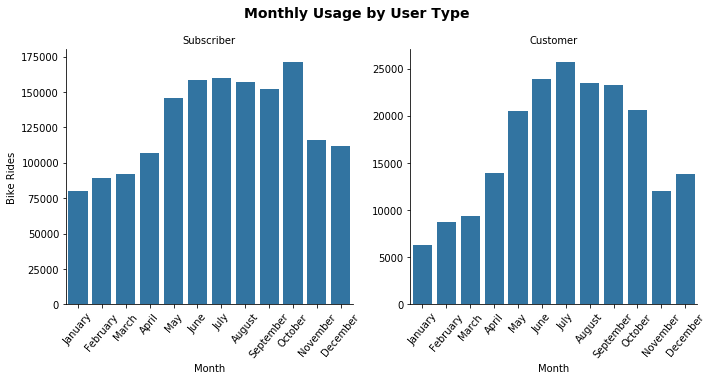

In [3]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

base_color = sns.color_palette()[0]

g = sns.catplot(data=df, x='start_time_month', col="user_type", kind='count', 
                sharey=False, color=base_color)
g.set_axis_labels("Month", "Bike Rides")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=50)
g.fig.suptitle('Monthly Usage by User Type', y=1.05, fontsize=14, fontweight='bold');

## Is the Ford GoBike Weekly Usage different by user type(subscriber and customer)?

> People ride bike twice the frequency in weekdays than weekends. It indicates that most people ride Ford GoBike for commuting. We get some findings here! Compared with subscribers, customers are more likely to ride on weekends. Providing promotions for customers on weekends might be a reasonable way to increasing the revenue.

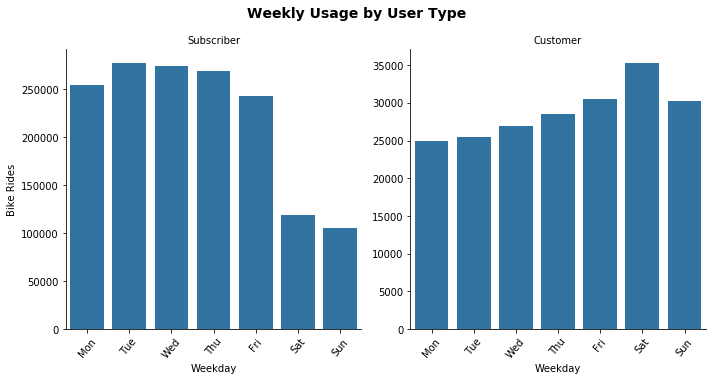

In [4]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='start_time_weekday', col="user_type", kind='count', 
                sharey=False, color=base_color, order=weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=50)
g.fig.suptitle('Weekly Usage by User Type', y=1.05, fontsize=14, fontweight='bold');

## Is the Ford GoBike Hourly Usage different by user type(subscriber and customer)?

> Yes, seem like customers ride bike often in between 8 am to 7 pm, while subscribers often ride bike on rush hours.

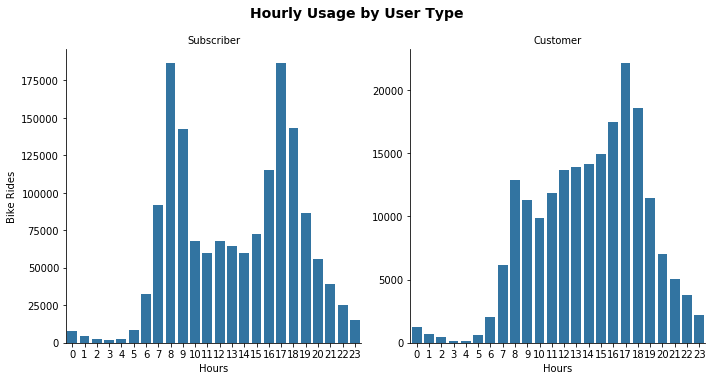

In [5]:
g = sns.catplot(data=df, x='start_time_hour', col="user_type", kind='count', 
                sharey=False, color=base_color)
g.set_axis_labels("Hours", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly Usage by User Type', y=1.05, fontsize=14, fontweight='bold');

## Is the duration time per ride different between user types?

> On average, customers tend to spend more time per ride compared with subscribers.

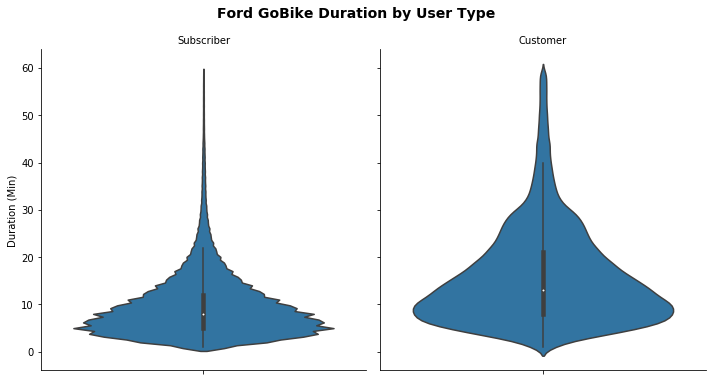

In [6]:
low_duration = df.query('duration_min < 60')
g = sns.catplot(data=low_duration, y='duration_min', col="user_type", kind='violin', color=base_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford GoBike Duration by User Type', y=1.05, fontsize=14, fontweight='bold');

## What is the monthly bike usage by user type and then by gender?

> The plot shows no much difference compared with the bivariate one, we can say that gender and user type have no interactions on monthly usage of Ford GoBike. There is another point we can see from the plot that customer has higher female proportion than subscribers.

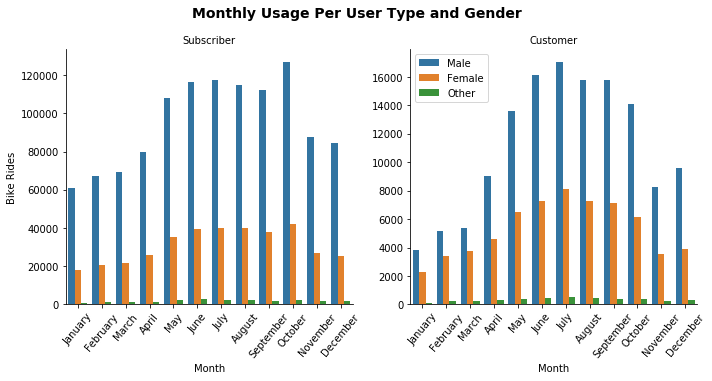

In [7]:
g = sns.catplot(data=df, x='start_time_month', col="user_type", hue="member_gender", 
                kind='count', sharey=False, legend=False)
g.set_axis_labels("Month", "Bike Rides")
g.set_xticklabels(rotation=50)
g.set_titles("{col_name}")
plt.legend(loc='upper left')
g.fig.suptitle('Monthly Usage Per User Type and Gender', y=1.05, fontsize=14, fontweight='bold');

## What is the weekly bike usage by user type and then by gender?

> There is no much difference compared with the bivariate plot.

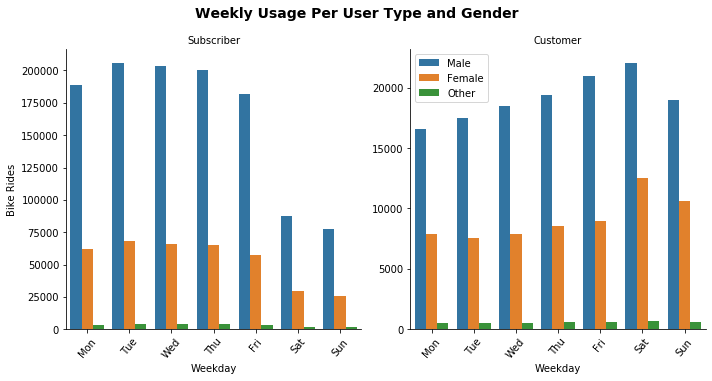

In [8]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df, x='start_time_weekday', col="user_type", hue="member_gender", 
                kind='count', sharey=False, legend=False, order=weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_xticklabels(rotation=50)
g.set_titles("{col_name}")
plt.legend(loc='upper left')
g.fig.suptitle('Weekly Usage Per User Type and Gender', y=1.05, fontsize=14, fontweight='bold');

## How dose usage distributed on both hours and weekdays for customers and subscribers?

> Since the main different between subscriber and customer is on hours and weekdays, we can build a heat map with weekday and hour to illustrate the different trend of riding Ford GoBike between them.

>This plot an appropriate example of how multi-dimensional visualization can carry more information. According to the heat map, we can conclude those popular time periods for customer to ride Ford GoBike are 5 pm in weekdays and 11 am to 5 pm in weekends.

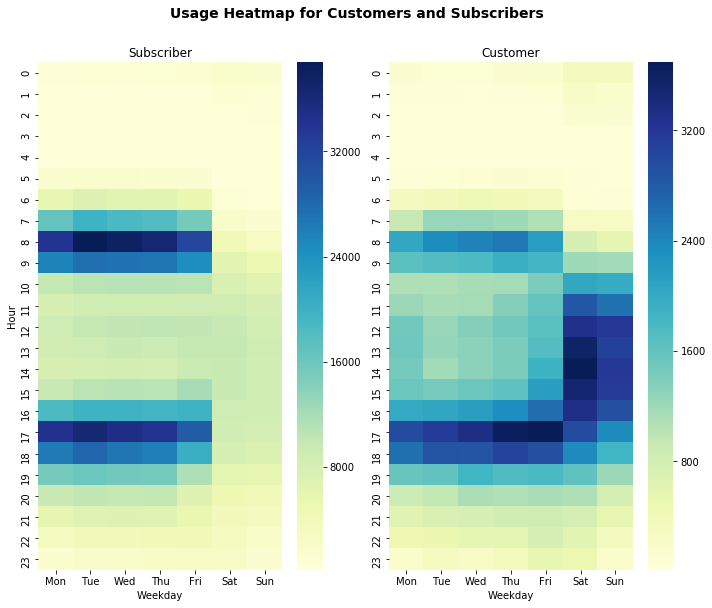

In [9]:
df['start_time_weekday'] = pd.Categorical(df['start_time_weekday'], 
                                          categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                          ordered=True)
plt.figure(figsize=(10, 8))
plt.suptitle('Usage Heatmap for Customers and Subscribers', y=1.05, fontsize=14, fontweight='bold')



# plot for subscriber
plt.subplot(1, 2, 1)
df_subscriber = df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="YlGnBu")

plt.title('Subscriber', y=1.01)
plt.xlabel('Weekday')
plt.ylabel('Hour')

# plot for customer
plt.subplot(1, 2, 2)
df_customer = df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="YlGnBu")

plt.title('Customer', y=1.01)
plt.xlabel('Weekday')
plt.ylabel('');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The findings in bivariate exploratory part are proven to be right in multivariate exploratory part. In the heat map, I found that is a good example of how multi-dimensional visualization can carry more information if appropriate encoding was used. According to these plot, there is a different trend between subscribers and customers that the most popular time periods for customer to ride Ford GoBike are 5 pm in weekdays and 11 am to 5 pm in weekends while subscriber's is rush hours in weekdays. Based on that, I think there are bunch of promotional actions can be applied to increase the revenue get from customers.

## Findings
In the univariate exploration:
* people tend to ride more from May to October
* most people use the bike for commuting
* the average duration per ride is around 10 minutes
* the major gender of the users is male
* the majority of user type is subscriber

In the bivariate exploration:
* Generally, people tend to ride more in summer and autumn, rush hour, and weekdays
* But there are some differences lies between customer usage and subscriber usage: 
  - customers tend to have higher duration per ride compared to subscribers 
  - customers tend to ride on weekends compared to subscribers
  
In the multivariate exploration:

The findings in bivariate exploratory part are proven to be right in multivariate exploratory part. In the heat map, I found that is a good example of how multi-dimensional visualization can carry more information if appropriate encoding was used. According to these plot, there is a different trend between subscribers and customers that the most popular time periods for customer to ride Ford GoBike are 5 pm in weekdays and 11 am to 5 pm in weekends while subscriber's is rush hours in weekdays. Based on that, I think there are bunch of promotional actions can be applied to increase the revenue get from customers.


## Insights

First of all, most people are subscribers that ride bike for commuting, so the demand of majority is high on rush hour in weekdays. Because of the weather and climate, people ride more on from May to October. 
Secondly, There are different usage patterns between customers and subscribers. Customers tend to have higher duration per ride, and they ride more often on weekends and Friday afternoon. Based on those findings, several promotion stategies can be proposed, for example: providing discount for customers at weekends. 

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 514134 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
